# Model with residual connections

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading train, validation and test sets

In [ ]:
ds = tfds.load('malaria', 
               split=('train[:60%]', 'train[60%:80%]', 'train[80%:]'), 
               shuffle_files=False,
              data_dir='/content/gdrive/MyDrive/datasets/Malaria',
               batch_size=32,
              download=True,
              as_supervised=True,
              with_info=False)

# Model building

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        min_delta=0,
        patience=5,
        verbose=1,
        mode="max",
        baseline=None,
        restore_best_weights=True)
    ]

In [ ]:
def build_model(init_filters, kernel_size, num_resid):
    '''I keep the number of filters the same in all layers in this version'''
    inputs = keras.Input(shape=(None, None, 3))
    x = keras.layers.Rescaling(scale=1.0 / 255)(inputs)
    x = keras.layers.Conv2D(
      filters=init_filters,
      kernel_size=kernel_size,
      strides=(1, 1),
      padding="same",
      activation='relu')(x)
    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=None, 
        padding="same")(x)
    prev_block_output = x
    for i in range(1, num_resid + 1):
        # i is the number of blocks with residual connections
      x = keras.layers.Conv2D(
          filters=init_filters,
          kernel_size=kernel_size,
          strides=(1, 1),
          padding="same",
          activation='relu')(x)
      x = keras.layers.Conv2D(
          filters=init_filters,
          kernel_size=kernel_size,
          strides=(1, 1),
          padding="same",
          activation='relu')(x)
      x = keras.layers.add([x, prev_block_output])
      prev_block_output = x
    x = keras.layers.Conv2D(
        filters=init_filters,
        kernel_size=kernel_size,
        strides=(1, 1),
        padding="same",
        activation='relu')(prev_block_output)
    x = keras.layers.GlobalMaxPooling2D()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(units=init_filters,
                            activation="relu",
                          kernel_regularizer=None)(x)
    x = keras.layers.Dropout(0.2)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='Adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])    
    return model

In [ ]:
model = build_model(32, 2, 1)
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_18 (Rescaling)       (None, None, None,   0           ['input_19[0][0]']               
                                3)                                                                
                                                                                                  
 conv2d_96 (Conv2D)             (None, None, None,   416         ['rescaling_18[0][0]']           
                                32)                                                        

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - ETA: 0s - loss: 0.5858 - accuracy: 0.6377

517/517 [==============================] - 86s 166ms/step - loss: 0.5858 - accuracy: 0.6377 - val_loss: 0.1734 - val_accuracy: 0.9447
Epoch 2/50
517/517 [==============================] - ETA: 0s - loss: 0.1647 - accuracy: 0.9503

517/517 [==============================] - 79s 154ms/step - loss: 0.1647 - accuracy: 0.9503 - val_loss: 0.1438 - val_accuracy: 0.9543
Epoch 3/50
517/517 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9523

517/517 [==============================] - 24s 47ms/step - loss: 0.1528 - accuracy: 0.9523 - val_loss: 0.1407 - val_accuracy: 0.9552
Epoch 4/50
517/517 [==============================] - ETA: 0s - loss: 0.1467 - accuracy: 0.9544

517/517 [==============================] - 24s 47ms/step - loss: 0.1467 - accuracy: 0.9544 - val_loss: 0.1357 - val_accuracy: 0.9565
Epoch 5/50
517/517 [==============================] - ETA: 0s - loss: 0.1456 - accuracy: 0.9542

517/517 [==============================] - 24s 47ms/step - loss: 0.1456 - accuracy: 0.9542 - val_loss: 0.1412 - val_accuracy: 0.9528
Epoch 6/50
517/517 [==============================] - ETA: 0s - loss: 0.1403 - accuracy: 0.9552

517/517 [==============================] - 25s 48ms/step - loss: 0.1403 - accuracy: 0.9552 - val_loss: 0.1417 - val_accuracy: 0.9516
Epoch 7/50
517/517 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9553

517/517 [==============================] - 24s 47ms/step - loss: 0.1388 - accuracy: 0.9553 - val_loss: 0.1408 - val_accuracy: 0.9516
Epoch 8/50
517/517 [==============================] - ETA: 0s - loss: 0.1365 - accuracy: 0.9569

517/517 [==============================] - 24s 47ms/step - loss: 0.1365 - accuracy: 0.9569 - val_loss: 0.1324 - val_accuracy: 0.9545
Epoch 9/50
517/517 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9562

517/517 [==============================] - 24s 47ms/step - loss: 0.1345 - accuracy: 0.9562 - val_loss: 0.1299 - val_accuracy: 0.9577
Epoch 10/50
517/517 [==============================] - ETA: 0s - loss: 0.1338 - accuracy: 0.9564

517/517 [==============================] - 25s 47ms/step - loss: 0.1338 - accuracy: 0.9564 - val_loss: 0.1275 - val_accuracy: 0.9579
Epoch 11/50
517/517 [==============================] - ETA: 0s - loss: 0.1319 - accuracy: 0.9568

517/517 [==============================] - 25s 48ms/step - loss: 0.1319 - accuracy: 0.9568 - val_loss: 0.1281 - val_accuracy: 0.9586
Epoch 12/50
517/517 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9575

517/517 [==============================] - 24s 47ms/step - loss: 0.1307 - accuracy: 0.9575 - val_loss: 0.1274 - val_accuracy: 0.9586
Epoch 13/50
517/517 [==============================] - ETA: 0s - loss: 0.1287 - accuracy: 0.9568

517/517 [==============================] - 25s 47ms/step - loss: 0.1287 - accuracy: 0.9568 - val_loss: 0.1318 - val_accuracy: 0.9592
Epoch 14/50
517/517 [==============================] - ETA: 0s - loss: 0.1292 - accuracy: 0.9585

517/517 [==============================] - 24s 47ms/step - loss: 0.1292 - accuracy: 0.9585 - val_loss: 0.1226 - val_accuracy: 0.9603
Epoch 15/50
517/517 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9583

517/517 [==============================] - 24s 47ms/step - loss: 0.1268 - accuracy: 0.9583 - val_loss: 0.1291 - val_accuracy: 0.9606
Epoch 16/50
517/517 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9588

517/517 [==============================] - 24s 47ms/step - loss: 0.1256 - accuracy: 0.9588 - val_loss: 0.1293 - val_accuracy: 0.9592
Epoch 17/50
517/517 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9592

517/517 [==============================] - 24s 47ms/step - loss: 0.1236 - accuracy: 0.9592 - val_loss: 0.1269 - val_accuracy: 0.9590
Epoch 18/50
517/517 [==============================] - ETA: 0s - loss: 0.1222 - accuracy: 0.9606

517/517 [==============================] - 24s 47ms/step - loss: 0.1222 - accuracy: 0.9606 - val_loss: 0.1239 - val_accuracy: 0.9610
Epoch 19/50
517/517 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9604

517/517 [==============================] - 25s 47ms/step - loss: 0.1211 - accuracy: 0.9604 - val_loss: 0.1199 - val_accuracy: 0.9615
Epoch 20/50
517/517 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9606

517/517 [==============================] - 24s 47ms/step - loss: 0.1181 - accuracy: 0.9606 - val_loss: 0.1252 - val_accuracy: 0.9590
Epoch 21/50
517/517 [==============================] - ETA: 0s - loss: 0.1186 - accuracy: 0.9612

517/517 [==============================] - 24s 47ms/step - loss: 0.1186 - accuracy: 0.9612 - val_loss: 0.1226 - val_accuracy: 0.9614
Epoch 22/50
517/517 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 0.9609

517/517 [==============================] - 24s 47ms/step - loss: 0.1168 - accuracy: 0.9609 - val_loss: 0.1253 - val_accuracy: 0.9606
Epoch 23/50
516/517 [============================>.] - ETA: 0s - loss: 0.1163 - accuracy: 0.9614

517/517 [==============================] - 24s 47ms/step - loss: 0.1162 - accuracy: 0.9615 - val_loss: 0.1218 - val_accuracy: 0.9584
Epoch 24/50
517/517 [==============================] - ETA: 0s - loss: 0.1146 - accuracy: 0.9612Restoring model weights from the end of the best epoch: 19.


517/517 [==============================] - 25s 48ms/step - loss: 0.1146 - accuracy: 0.9612 - val_loss: 0.1230 - val_accuracy: 0.9612
Epoch 24: early stopping


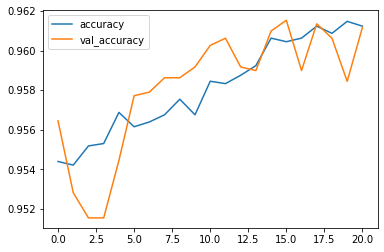

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'][3:],
              'val_accuracy': history.history['val_accuracy'][3:]}).plot.line();

In [ ]:
 max(history.history['val_accuracy'])

0.9615314602851868

# Some improvement compared to the previous version without residual connections. 
# Another attempt 

In [ ]:
model = build_model(32, 2, 5)

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - 52s 98ms/step - loss: 0.2592 - accuracy: 0.8919 - val_loss: 0.1536 - val_accuracy: 0.9519
Epoch 2/50
517/517 [==============================] - 52s 101ms/step - loss: 0.1649 - accuracy: 0.9487 - val_loss: 0.1557 - val_accuracy: 0.9512
Epoch 3/50
517/517 [==============================] - 52s 100ms/step - loss: 0.1551 - accuracy: 0.9520 - val_loss: 0.1478 - val_accuracy: 0.9546
Epoch 4/50
517/517 [==============================] - 52s 100ms/step - loss: 0.1526 - accuracy: 0.9522 - val_loss: 0.1473 - val_accuracy: 0.9546
Epoch 5/50
517/517 [==============================] - 52s 100ms/step - loss: 0.1441 - accuracy: 0.9558 - val_loss: 0.1311 - val_accuracy: 0.9563
Epoch 6/50
517/517 [==============================] - 52s 100ms/step - loss: 0.1427 - accuracy: 0.9557 - val_loss: 0.1325 - val_accuracy: 0.9579
Epoch 7/50
517/517 [==============================] - 52s 101ms/step - loss: 0.1425 - accuracy: 0.9562 - val_loss: 0.1283 - val_acc

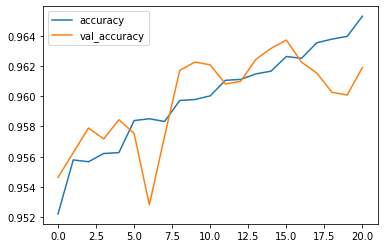

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'][3:],
              'val_accuracy': history.history['val_accuracy'][3:]}).plot.line();

In [ ]:
max(history.history['val_accuracy'])

0.9637089371681213

In [ ]:
model.evaluate(ds[1])

173/173 [==============================] - 5s 30ms/step - loss: 0.1175 - accuracy: 0.9637


[0.11753672361373901, 0.9637089371681213]

# Conclusions from this stage

The results are encouraging
The results are encouraging, almost 1% better than without residual connections so I will try Bayesian optimization in the following notebook.

Automatic optimization with the Bayesian tuner did not finish due to Google Colabe usage limits but demonstated that larger numbers of filters and residual blocks worked better. A few more attempts at manual optimization

Completing the cycle that did not finish during the automatic tuning

In [ ]:
model = build_model(16, 3, 6)

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - 39s 75ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6759 - val_accuracy: 0.5003
Epoch 2/50
517/517 [==============================] - 39s 75ms/step - loss: 0.2619 - accuracy: 0.8903 - val_loss: 0.1458 - val_accuracy: 0.9577
Epoch 3/50
517/517 [==============================] - 38s 74ms/step - loss: 0.2005 - accuracy: 0.9519 - val_loss: 0.1433 - val_accuracy: 0.9572
Epoch 4/50
517/517 [==============================] - 38s 74ms/step - loss: 0.1846 - accuracy: 0.9542 - val_loss: 0.1326 - val_accuracy: 0.9574
Epoch 5/50
517/517 [==============================] - 40s 76ms/step - loss: 0.1758 - accuracy: 0.9540 - val_loss: 0.1465 - val_accuracy: 0.9521
Epoch 6/50
517/517 [==============================] - 39s 75ms/step - loss: 0.1683 - accuracy: 0.9557 - val_loss: 0.1340 - val_accuracy: 0.9539
Epoch 7/50
517/517 [==============================] - 40s 76ms/step - loss: 0.1641 - accuracy: 0.9553 - val_loss: 0.1350 - val_accuracy:

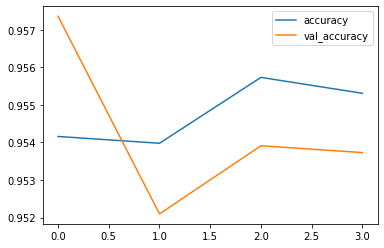

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'][3:],
              'val_accuracy': history.history['val_accuracy'][3:]}).plot.line();

In [ ]:
max(history.history['val_accuracy'])

0.957720935344696

In [ ]:
model = build_model(64, 3, 7)

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - 383s 717ms/step - loss: 0.4505 - accuracy: 0.7396 - val_loss: 0.1628 - val_accuracy: 0.9483
Epoch 2/50
517/517 [==============================] - 163s 316ms/step - loss: 0.1552 - accuracy: 0.9523 - val_loss: 0.1981 - val_accuracy: 0.9379
Epoch 3/50
517/517 [==============================] - 163s 315ms/step - loss: 0.1467 - accuracy: 0.9543 - val_loss: 0.1982 - val_accuracy: 0.9454
Epoch 4/50
517/517 [==============================] - 162s 314ms/step - loss: 0.1408 - accuracy: 0.9566 - val_loss: 0.1622 - val_accuracy: 0.9508
Epoch 5/50
517/517 [==============================] - 162s 313ms/step - loss: 0.1367 - accuracy: 0.9570 - val_loss: 0.1416 - val_accuracy: 0.9557
Epoch 6/50
517/517 [==============================] - 162s 313ms/step - loss: 0.1341 - accuracy: 0.9582 - val_loss: 0.1622 - val_accuracy: 0.9483
Epoch 7/50
517/517 [==============================] - 163s 314ms/step - loss: 0.1326 - accuracy: 0.9589 - val_loss: 0.1300 -

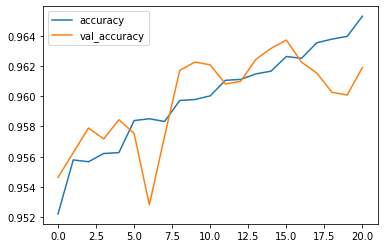

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'][3:],
              'val_accuracy': history.history['val_accuracy'][3:]}).plot.line();

In [ ]:
max(history.history['val_accuracy'])

0.9637089371681213

No improvement from an added residual block. Increasing the kernel size

In [ ]:
model = build_model(64, 4, 6)

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - 435s 838ms/step - loss: 0.3937 - accuracy: 0.7837 - val_loss: 0.1834 - val_accuracy: 0.9398
Epoch 2/50
517/517 [==============================] - 221s 427ms/step - loss: 0.1477 - accuracy: 0.9562 - val_loss: 0.1843 - val_accuracy: 0.9412
Epoch 3/50
517/517 [==============================] - 220s 426ms/step - loss: 0.1430 - accuracy: 0.9570 - val_loss: 0.1367 - val_accuracy: 0.9532
Epoch 4/50
517/517 [==============================] - 220s 426ms/step - loss: 0.1375 - accuracy: 0.9578 - val_loss: 0.1384 - val_accuracy: 0.9574
Epoch 5/50
517/517 [==============================] - 220s 425ms/step - loss: 0.1360 - accuracy: 0.9582 - val_loss: 0.1411 - val_accuracy: 0.9548
Epoch 6/50
517/517 [==============================] - 220s 425ms/step - loss: 0.1289 - accuracy: 0.9591 - val_loss: 0.1205 - val_accuracy: 0.9606
Epoch 7/50
517/517 [==============================] - 220s 425ms/step - loss: 0.1270 - accuracy: 0.9596 - val_loss: 0.1278 -

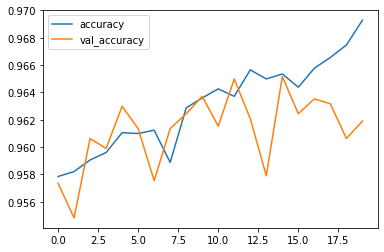

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'][3:],
              'val_accuracy': history.history['val_accuracy'][3:]}).plot.line();

In [ ]:
max(history.history['val_accuracy'])

0.965160608291626

This was my second attempt at these parameters on another day. The first attempt achieved the best score on the first day, when other parameter sets were tried (0.9661)

In [ ]:
model = build_model(16, 5, 6)

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - 134s 256ms/step - loss: 0.2740 - accuracy: 0.8706 - val_loss: 0.1516 - val_accuracy: 0.9534
Epoch 2/50
517/517 [==============================] - 48s 92ms/step - loss: 0.1537 - accuracy: 0.9554 - val_loss: 0.1462 - val_accuracy: 0.9545
Epoch 3/50
517/517 [==============================] - 47s 90ms/step - loss: 0.1471 - accuracy: 0.9559 - val_loss: 0.1401 - val_accuracy: 0.9554
Epoch 4/50
517/517 [==============================] - 48s 92ms/step - loss: 0.1417 - accuracy: 0.9568 - val_loss: 0.1310 - val_accuracy: 0.9592
Epoch 5/50
517/517 [==============================] - 47s 90ms/step - loss: 0.1395 - accuracy: 0.9574 - val_loss: 0.1336 - val_accuracy: 0.9570
Epoch 6/50
517/517 [==============================] - 48s 93ms/step - loss: 0.1372 - accuracy: 0.9586 - val_loss: 0.1241 - val_accuracy: 0.9606
Epoch 7/50
517/517 [==============================] - 47s 90ms/step - loss: 0.1343 - accuracy: 0.9592 - val_loss: 0.1183 - val_accurac

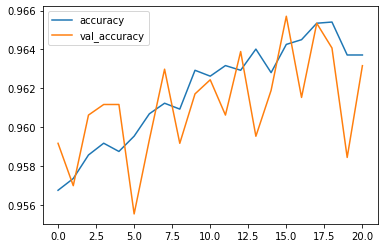

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'][3:],
              'val_accuracy': history.history['val_accuracy'][3:]}).plot.line();

In [ ]:
max(history.history['val_accuracy'])

0.9657049775123596

In [ ]:
model = build_model(64, 5, 6)

In [ ]:
history = model.fit(
    ds[0],
    epochs=50,
    verbose="auto",
    callbacks=callbacks,
    validation_data=ds[1]
)

Epoch 1/50
517/517 [==============================] - 474s 914ms/step - loss: 0.2612 - accuracy: 0.8798 - val_loss: 0.1813 - val_accuracy: 0.9365
Epoch 2/50
517/517 [==============================] - 177s 343ms/step - loss: 0.1456 - accuracy: 0.9564 - val_loss: 0.1512 - val_accuracy: 0.9545
Epoch 3/50
517/517 [==============================] - 177s 342ms/step - loss: 0.1505 - accuracy: 0.9540 - val_loss: 0.1414 - val_accuracy: 0.9561
Epoch 4/50
517/517 [==============================] - 177s 342ms/step - loss: 0.1380 - accuracy: 0.9566 - val_loss: 0.1366 - val_accuracy: 0.9541
Epoch 5/50
517/517 [==============================] - 177s 342ms/step - loss: 0.1362 - accuracy: 0.9579 - val_loss: 0.1247 - val_accuracy: 0.9601
Epoch 6/50
517/517 [==============================] - 177s 342ms/step - loss: 0.1321 - accuracy: 0.9592 - val_loss: 0.1265 - val_accuracy: 0.9601
Epoch 7/50
517/517 [==============================] - 177s 342ms/step - loss: 0.1305 - accuracy: 0.9598 - val_loss: 0.1295 -

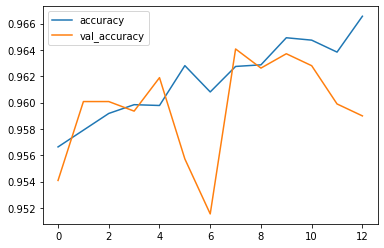

In [ ]:
pd.DataFrame({'accuracy': history.history['accuracy'][3:],
              'val_accuracy': history.history['val_accuracy'][3:]}).plot.line();

In [ ]:
max(history.history['val_accuracy'])

0.9640718698501587

#Conclusion
The best parameters are 64, 4, 6